# Лабораторная работа №2
## Понижение размерности пространства признаков
### Цель:
Ознакомиться с методами понижения размерности данных из библиотеки Scikit Learn
### Выполнение:
#### Загрузка данных

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('glass.csv')
var_names = list(df.columns) #получение имен признаков
labels = df.to_numpy('int')[:,-1] #метки классов
data = df.to_numpy('float')[:,:-1] #описательные признаки

In [3]:
from sklearn import preprocessing
data = preprocessing.minmax_scale(data)

#### Диаграммы рассеяния для пар признаков 

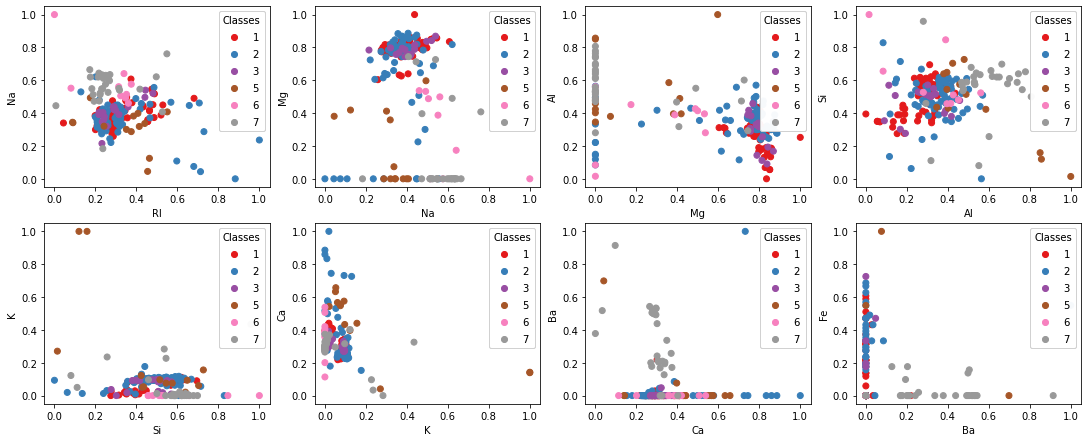

In [4]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,4)
for i in range(data.shape[1]-1):
    scatter = axs[i // 4, i % 4].scatter(data[:,i],data[:,(i+1)],c=labels,cmap='Set1')
    axs[i // 4, i % 4].set_xlabel(var_names[i])
    axs[i // 4, i % 4].set_ylabel(var_names[i+1])
    legend = axs[i // 4, i % 4].legend(*scatter.legend_elements(),loc="upper right", title="Classes")
    axs[i // 4, i % 4].add_artist(legend)
plt.subplots_adjust(-1.5,-0.5)
plt.show()

### Метод главных компонент

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_data = pca.fit(data).transform(data)

In [6]:
print('Значение объясненной дисперсии: ',pca.explained_variance_ratio_*100)
print('Собственные числа: ',pca.singular_values_)

Значение объясненной дисперсии:  [45.42956891 17.9900973 ]
Собственные числа:  [5.1049308  3.21245688]


Объясненная дисперсия показывает, сколько информации можно отнести к каждому из основных компонентов.

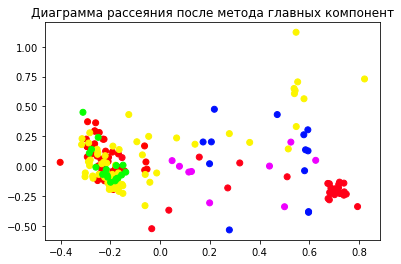

In [7]:
plt.scatter(pca_data[:,0],pca_data[:,1],c=labels,cmap='hsv')
plt.title('Диаграмма рассеяния после метода главных компонент')
plt.show()

Мы проецировали исходные данные, которые являются 9-мерными в 2-х измерениях. Тем самым самым выделили две главные компоненты - основные аспекты вариации. Получили двухкомпонетный PCA график, который объединяет вс 9 признаков. Компонеты объясняют в сумме примерно 63% данных.

In [8]:
pca = PCA(0.85)
pca_data=pca.fit_transform(data)
len(pca.explained_variance_ratio_)

4

4 главные компоненты объясняют более 85% данных

In [9]:
new_data = pca.inverse_transform(pca_data)
pd.DataFrame(new_data)

,0,1,2,3,4,5,6,7,8
0,0.413560,0.405127,0.991335,0.228206,0.337820,0.064268,0.315113,0.006391,-0.008878
1,0.260258,0.420059,0.803878,0.334469,0.512633,0.087301,0.243815,0.019321,-0.013243
2,0.210728,0.417649,0.784256,0.358400,0.564974,0.095590,0.215681,0.012166,-0.000087
3,0.283103,0.406479,0.825200,0.307642,0.504755,0.080058,0.264735,-0.000243,0.008153
4,0.251520,0.399277,0.802985,0.305859,0.560916,0.077654,0.258397,-0.026301,0.003014
...,...,...,...,...,...,...,...,...,...
209,0.235777,0.547346,-0.030546,0.681190,0.509672,0.132409,0.288575,0.368020,0.012621
210,0.255351,0.550793,-0.017736,0.652575,0.504071,0.120813,0.305012,0.352229,-0.038937
211,0.302867,0.535668,-0.035828,0.614824,0.491007,0.105099,0.354692,0.332143,-0.020359
212,0.224560,0.530193,-0.028102,0.632925,0.577042,0.113836,0.307516,0.302185,-0.025100


Полученные данные отличаются от исходных, т.к. при уменьшении размерности с помощью PCA была потеряна информации, потому что компоненты объясняли 85% данных.

In [10]:
for i,param in enumerate (['full','auto','arpack','randomized']):
    pca = PCA(n_components = 4, svd_solver=param)
    pca_data = pca.fit(data).transform(data)
    explained_variance = np.var(pca_data, axis=0)
    print('Для',param)
    print(pca.explained_variance_ratio_)
    

Для full
[0.45429569 0.17990097 0.12649459 0.09797847]
Для auto
[0.45429569 0.17990097 0.12649459 0.09797847]
Для arpack
[0.45429569 0.17990097 0.12649459 0.09797847]
Для randomized
[0.45429569 0.17990097 0.12649459 0.09797847]


SVD - метод разложения на собственные числа, все значения объясненных дисперсий совпадают.

### Модификации метода главных компонент

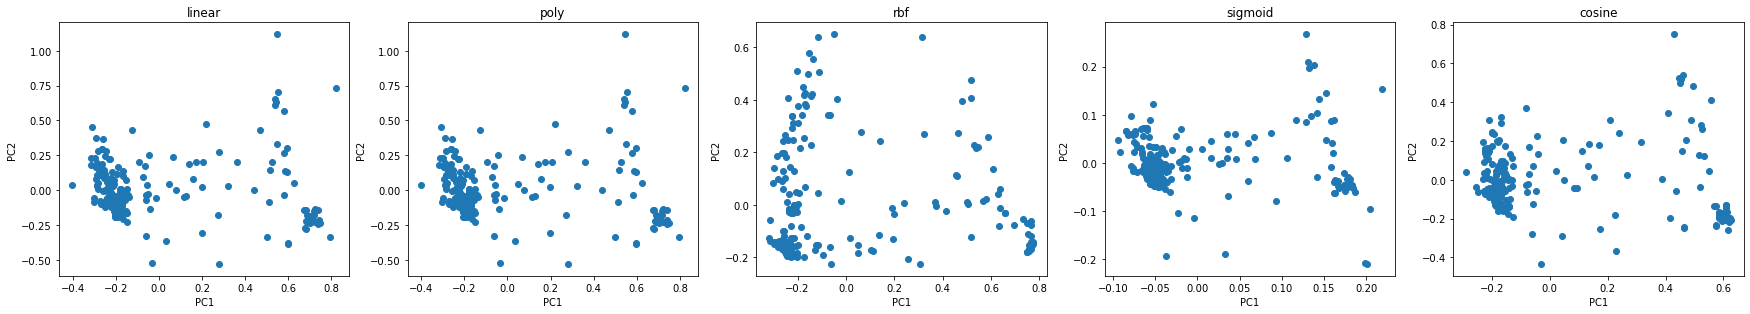

In [11]:
fig, axs = plt.subplots(1,5)
from sklearn.decomposition import KernelPCA
for i,param in enumerate (['linear','poly','rbf','sigmoid','cosine']):
    kpca = KernelPCA(kernel=param, n_components=2,gamma=1,degree=1)
    kpca_transform = kpca.fit_transform(data)
    scatter = axs[i].scatter(kpca_transform[:,0],kpca_transform[:,1])
    axs[i].set_xlabel('PC1')
    axs[i].set_ylabel('PC2')
    axs[i].set_title(param)
plt.subplots_adjust(-3,0)

По диаграммам рассеяния можем увидеть, что для параметров linear и poly две главные компоненты совпадают, а для остальных параметров компоненты различны.

In [ ]:
new_df = pd.DataFrame()
pca = PCA(n_components=2)
pca_data = pca.fit(data).transform(data)
new_df['PCA PC1'] = pca_data[:,0]
new_df['PCA PC2'] = pca_data[:,1]

kpca = KernelPCA(kernel='linear', n_components=2)
kpca_transform = kpca.fit_transform(data)
new_df['KPCA PC1']=kpca_transform[:,0]
new_df['KPCA PC2']=kpca_transform[:,1]
new_df

Т.е. PCA и KernelPCA с параметром kernel = linear работают одинаково, т.к. PCA является линейным методом анализа главных компонент.

In [ ]:
from sklearn.decomposition import SparsePCA
spca = SparsePCA(n_components=2,alpha=0.5)
spca_transform = spca.fit_transform(data)
new_df['SPCA C1'] = spca_transform[:,0]
new_df['SPCA C2'] = spca_transform[:,1]
new_df

In [ ]:
plt.scatter(spca_transform[:,0],spca_transform[:,1])
plt.xlabel('C1')
plt.ylabel('C2')
plt.show()

SparsePCA находит набор разреженных компонентов, которые позволяют оптимально перестроить данные. Чем больше параметр alpha (степень разреженности), тем более разреженные результаты будут получены

### Факторный анализ

In [ ]:
from sklearn.decomposition import FactorAnalysis
transformer = FactorAnalysis(n_components=2)
data_transformed = transformer.fit_transform(data)
new_df['FA C1'] = data_transformed[:,0]
new_df['FA C2'] = data_transformed[:,1]
new_df

Результаты работы PCA и FactorAnalysis заметно разичаются. Эта разница возникает из-ра различных подходов вычислений.<br>
Различия:
1. В PCA компоненты вычисляются как линейные комбинации исходных переменных. В FA исходные переменные определяются как линейные комбинации факторов.
2. В PCA цель состоит в том, чтобы учесть как можно большую часть общей дисперсии переменных. Задача FA - объяснить ковариации или корреляции между переменными.
3. PCA используется для сокращения данных на меньшее количество компонентов. FA используется для понимания того, какие конструкции лежат в основе данных.